In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("/kaggle/input/customer-churn-dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
len(df)

10000

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df_clean = df.drop(columns =['RowNumber', 'CustomerId', 'Surname','Geography'])
df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df_clean["Gender"] = df_clean["Gender"].map({"Male":1,"Female":0})
df_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


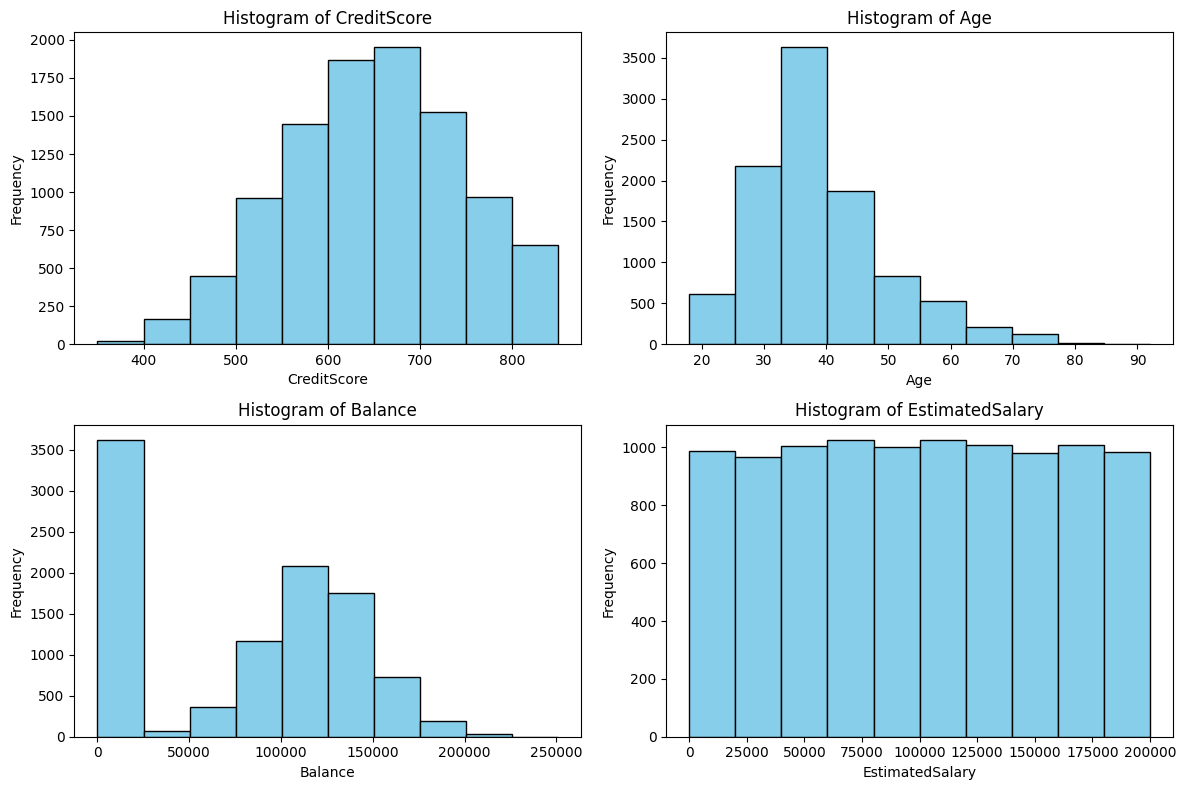

In [9]:
continous = ["CreditScore","Age","Balance","EstimatedSalary"]
# Create subplot: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(continous):
    axs[i].hist(df[var], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

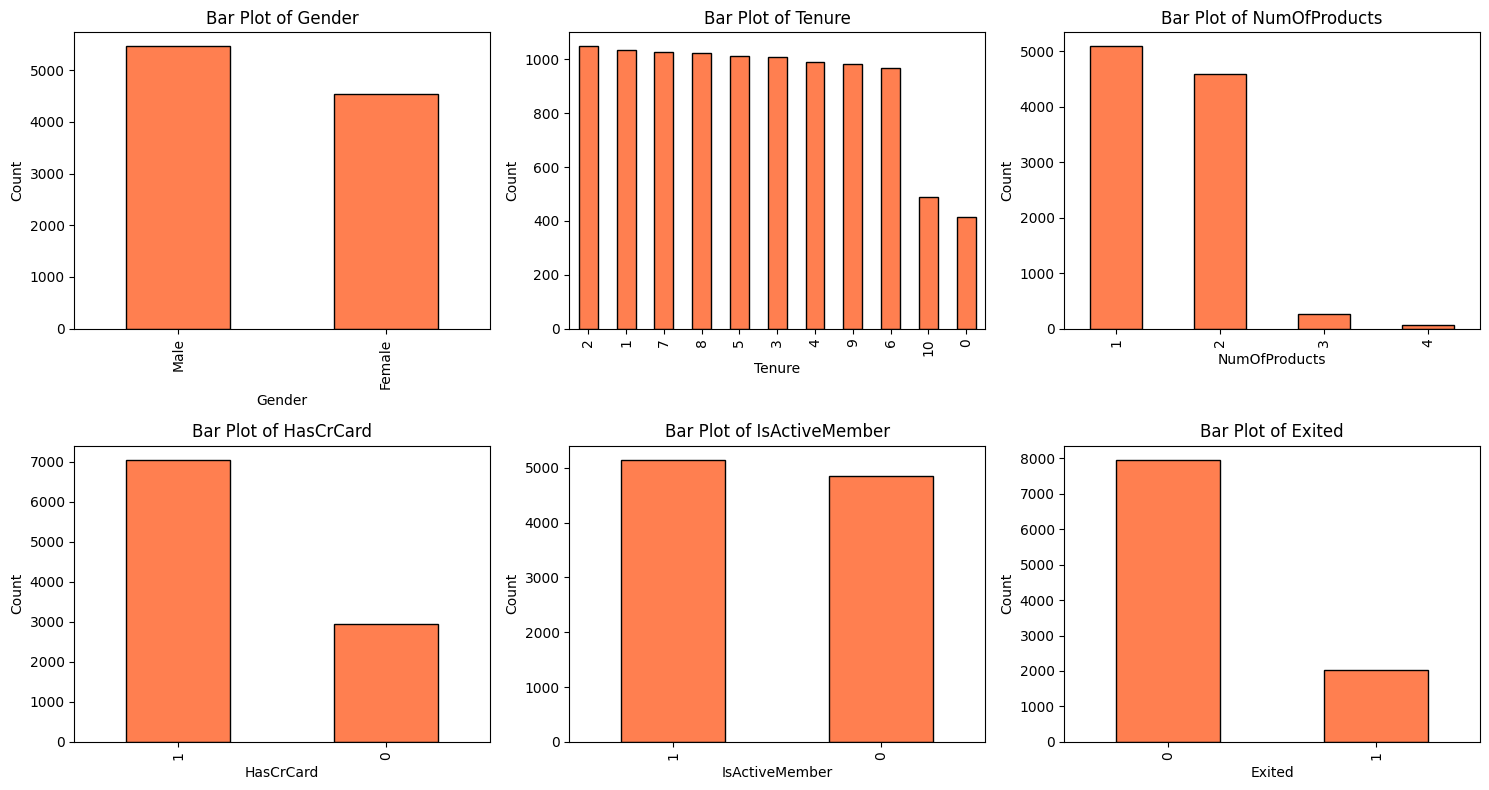

In [11]:
categorical = ["Gender", "Tenure","NumOfProducts","HasCrCard","IsActiveMember", "Exited"]
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(categorical):
    df[col].value_counts().plot(kind='bar', ax=axs[i], color='coral', edgecolor='black')
    axs[i].set_title(f'Bar Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

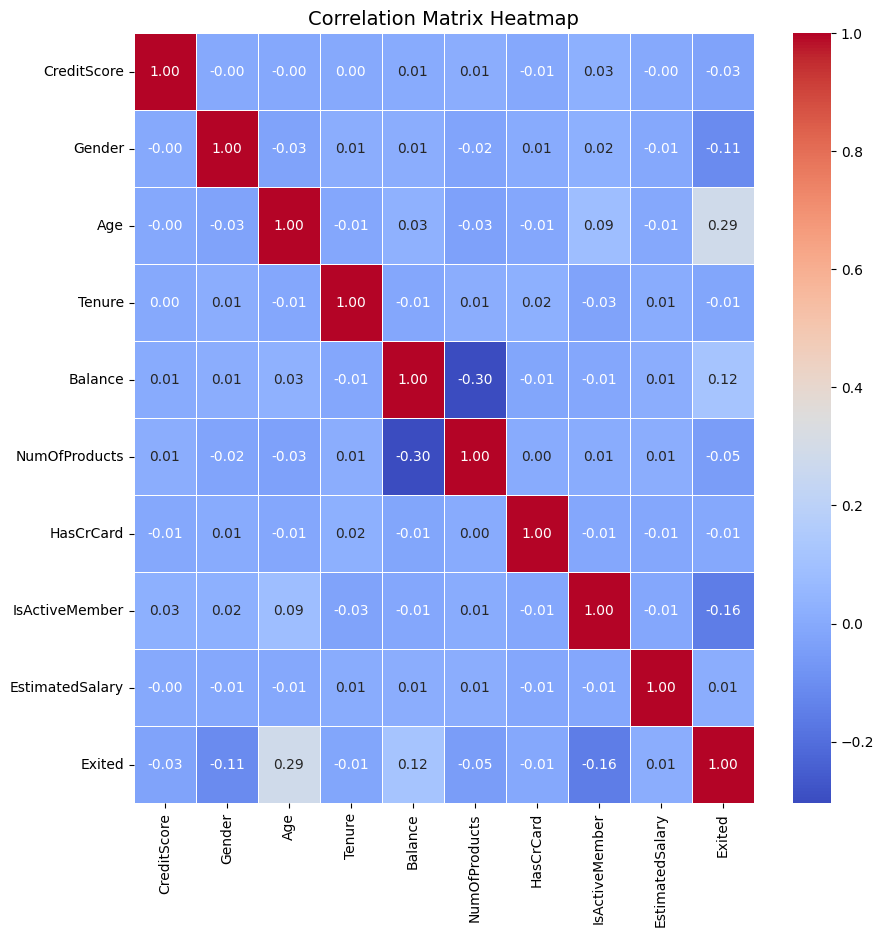

In [13]:
# Compute correlation matrix
corr_matrix = df_clean.corr()
# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

In [16]:
# Features and Target
X = df_clean.drop(columns=["Exited"])  # Features 
y = df_clean["Exited"]  # Target (0 or 1)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Define the Random Forest Pipeline
rf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Apply SMOTE
    ('rf', RandomForestClassifier(
        n_estimators=300,  # Number of trees
        max_depth=10,      # Maximum depth of trees
        min_samples_split=5,  # Minimum samples required to split a node
        min_samples_leaf=2,  # Minimum samples per leaf
        class_weight='balanced',  # Handle imbalance
        random_state=42
    ))
])

# Train the Random Forest Pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=300, random_state=42))])

In [18]:
# Predictions for Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
# Evaluation for Random Forest
print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Results:
Accuracy: 0.8085
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.52      0.66      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.81      0.82      2000



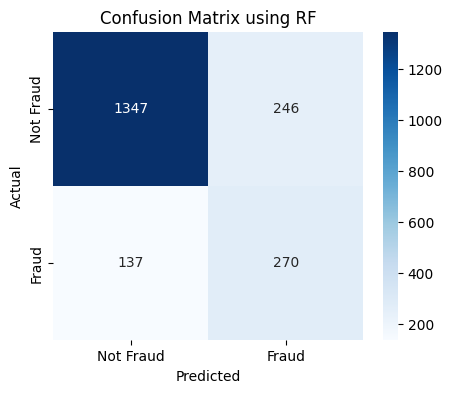

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using RF")
plt.show()

In [22]:
# Define the LightGBM Pipeline
lgbm_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Apply SMOTE
    ('lgbm', LGBMClassifier(
        n_estimators=300,  # Number of trees
        learning_rate=0.05,  # Step size shrinkage
        max_depth=10,  # Maximum depth
        num_leaves=31,  # Number of leaves in one tree
        subsample=0.8,  # Fraction of samples per tree
        colsample_bytree=0.8,  # Fraction of features per tree
        reg_lambda=1,  # L2 regularization
        reg_alpha=0,  # L1 regularization
        class_weight='balanced',  # Handle class imbalance
        random_state=42
    ))
])
# Train the LightGBM Pipeline
lgbm_pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3185, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 9555, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('lgbm',
                 LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
                                learning_rate=0.05, max_depth=10,
                                n_estimators=300, random_state=42, reg_alpha=0,
                                reg_lambda=1, subsample=0.8))])

In [23]:
# Predictions for LightGBM
y_pred_lgbm = lgbm_pipeline.predict(X_test)
# Evaluation for LightGBM
print("\n LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))


 LightGBM Results:
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1593
           1       0.55      0.59      0.57       407

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.82      0.82      2000



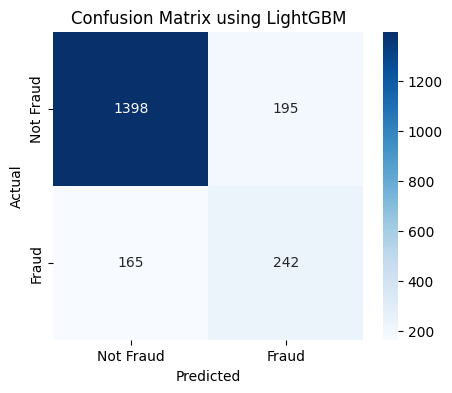

In [24]:
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using LightGBM")
plt.show()

In [25]:
# Define the Pipeline
xg_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Standardize data
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Apply SMOTE
    ('xgb', XGBClassifier(
        n_estimators=300,       # Number of trees
        learning_rate=0.05,     # Step size shrinkage
        max_depth=6,            # Maximum depth of trees
        min_child_weight=1,     # Minimum sum of instance weight (hessian) needed in a child
        subsample=0.8,          # Fraction of samples used per tree
        colsample_bytree=0.8,   # Fraction of features used per tree
        gamma=0,                # Minimum loss reduction for split
        reg_lambda=1,           # L2 regularization
        reg_alpha=0,            # L1 regularization
        objective='binary:logistic',  # Binary classification
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# Train the Pipeline
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [26]:
# Predictions
y_pred_xg = xg_pipeline.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Classification Report:\n", classification_report(y_test, y_pred_xg))

Accuracy: 0.8445
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1593
           1       0.66      0.50      0.57       407

    accuracy                           0.84      2000
   macro avg       0.77      0.71      0.74      2000
weighted avg       0.83      0.84      0.84      2000



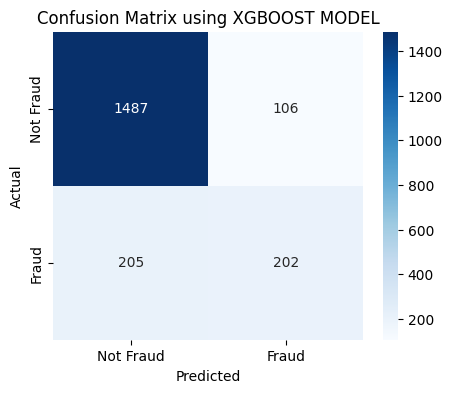

In [27]:
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using XGBOOST MODEL")
plt.show()

In [28]:
from sklearn.ensemble import VotingClassifier

In [29]:
# Define individual models
xgb_clf = XGBClassifier(n_estimators=200, eval_metric="logloss", random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
lgb_clf = LGBMClassifier(n_estimators=200, learning_rate=0.1, num_leaves=31, random_state=42)
# Create an ensemble VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('lgb', lgb_clf)],
    voting='soft'  # Soft voting to use probability estimates
)
# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('lgb',
                              LGBMClassifier(n_estimators=200,
                                             random_state=42))],
                 voting='soft')

In [30]:
# Predict on test set
y_pred_en = ensemble_clf.predict(X_test)
# Evaluation for Ensemble Forest
print("\n Ensemble Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_en))
print("Classification Report:\n", classification_report(y_test, y_pred_en))


 Ensemble Model Results:
Accuracy: 0.8445
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.43      0.53       407

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



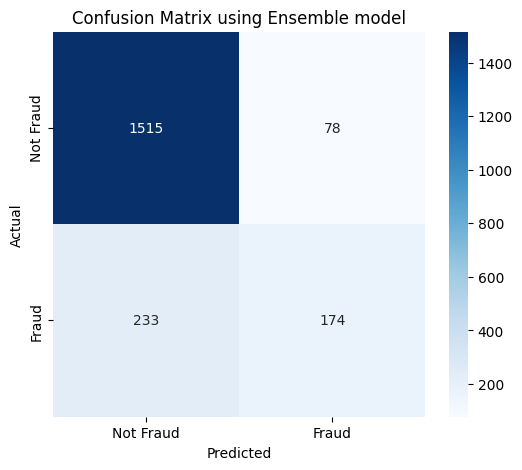

In [31]:
cm = confusion_matrix(y_test, y_pred_en)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix using Ensemble model")
plt.show()

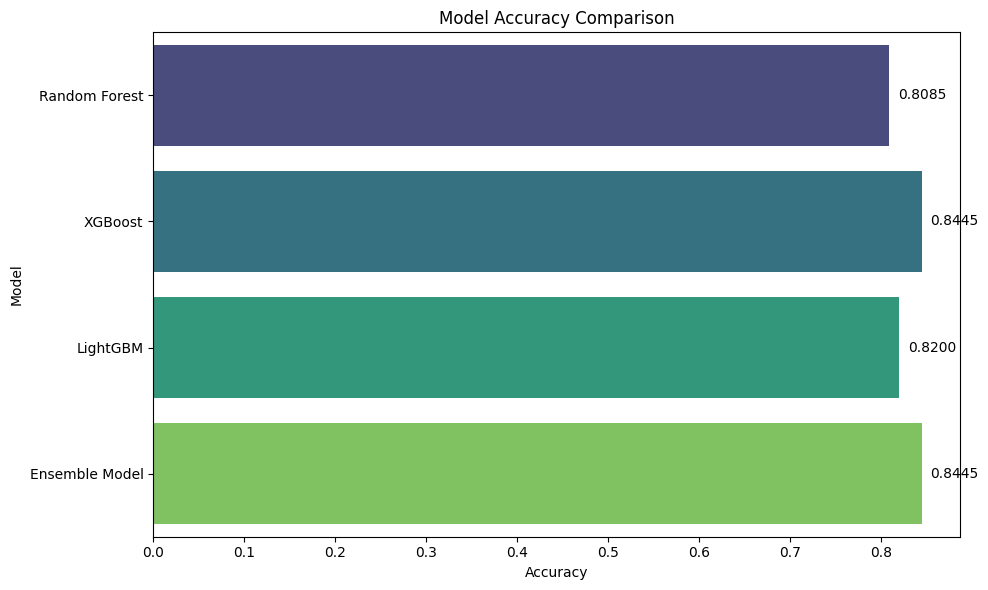

In [32]:
# Calculate accuracy for each model
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xg)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
acc_en = accuracy_score(y_test, y_pred_en)

# Create a dictionary with model names and corresponding accuracy values
accuracy_dict = {
    'Random Forest': acc_rf,
    'XGBoost': acc_xgb,
    'LightGBM': acc_lgbm,
    'Ensemble Model': acc_en}
# Convert dictionary to DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
# Add the accuracy values on top of the bars
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')
# Set labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
# Show the plot
plt.tight_layout()
plt.show()

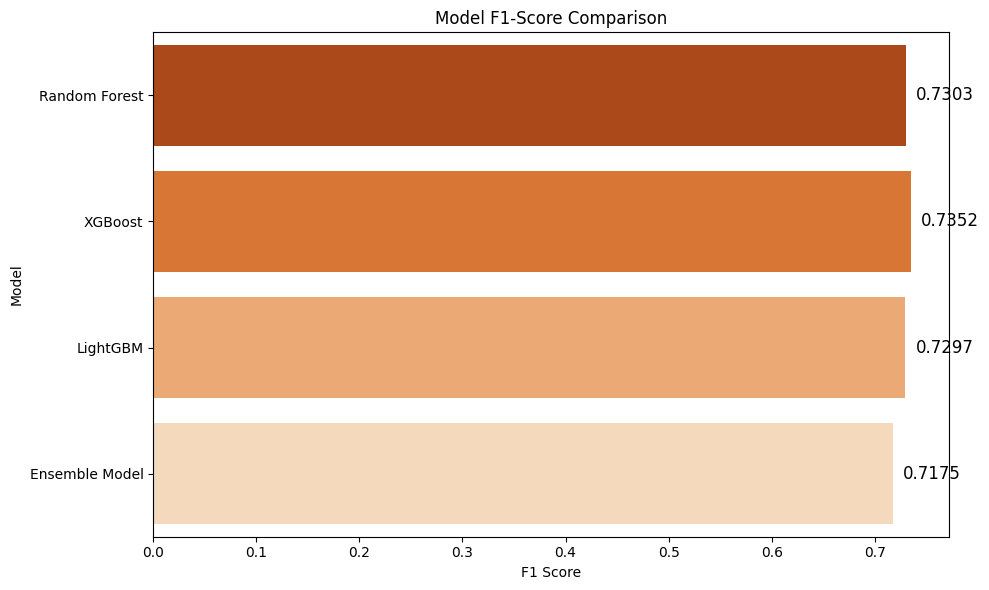

In [33]:
from sklearn.metrics import f1_score
# Compute F1 scores
f1_scores = {
    'Random Forest': f1_score(y_test, y_pred_rf, average='macro'),
    'XGBoost': f1_score(y_test, y_pred_xg, average='macro'),
    'LightGBM': f1_score(y_test, y_pred_lgbm, average='macro'),
    'Ensemble Model': f1_score(y_test, y_pred_en, average='macro')
}

# Convert to DataFrame
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1-Score'])

# Create F1-score bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=f1_df, palette='Oranges_r')

# Add values on bars
for index, value in enumerate(f1_df['F1-Score']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)
# Labels and title
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('Model F1-Score Comparison')
plt.tight_layout()
plt.show()

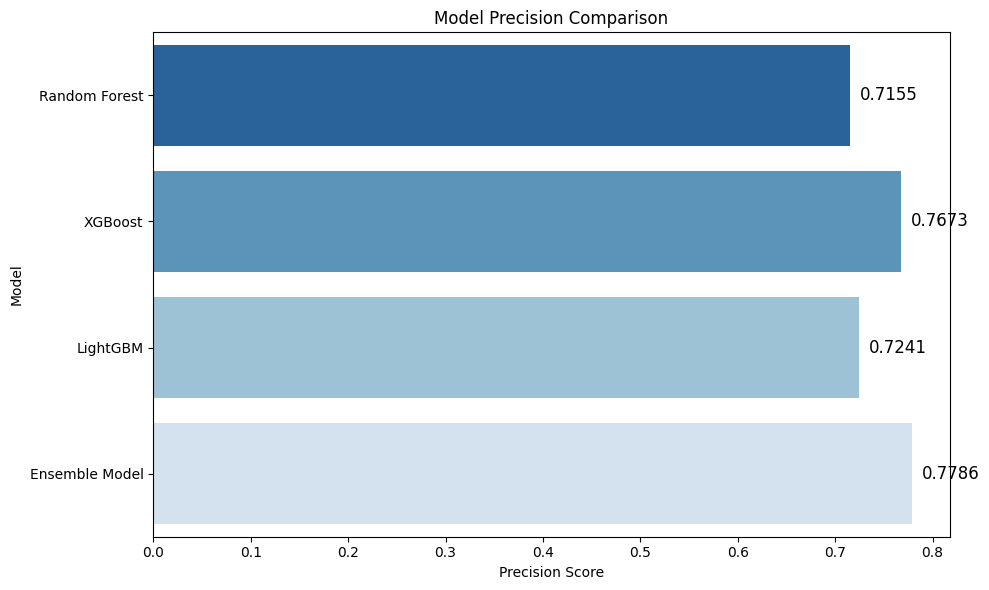

In [34]:
from sklearn.metrics import precision_score
# Compute precision scores
prec_scores = {
    'Random Forest': precision_score(y_test, y_pred_rf, average='macro'),
    'XGBoost': precision_score(y_test, y_pred_xg, average='macro'),
    'LightGBM': precision_score(y_test, y_pred_lgbm, average='macro'),
    'Ensemble Model': precision_score(y_test, y_pred_en, average='macro')
}

# Convert to DataFrame
precision_df = pd.DataFrame(list(prec_scores.items()), columns=['Model', 'Precision'])

# Create Precision bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision', y='Model', data=precision_df, palette='Blues_r')

# Add values on bars
for index, value in enumerate(precision_df['Precision']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)

# Labels and title
plt.xlabel('Precision Score')
plt.ylabel('Model')
plt.title('Model Precision Comparison')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import recall_score

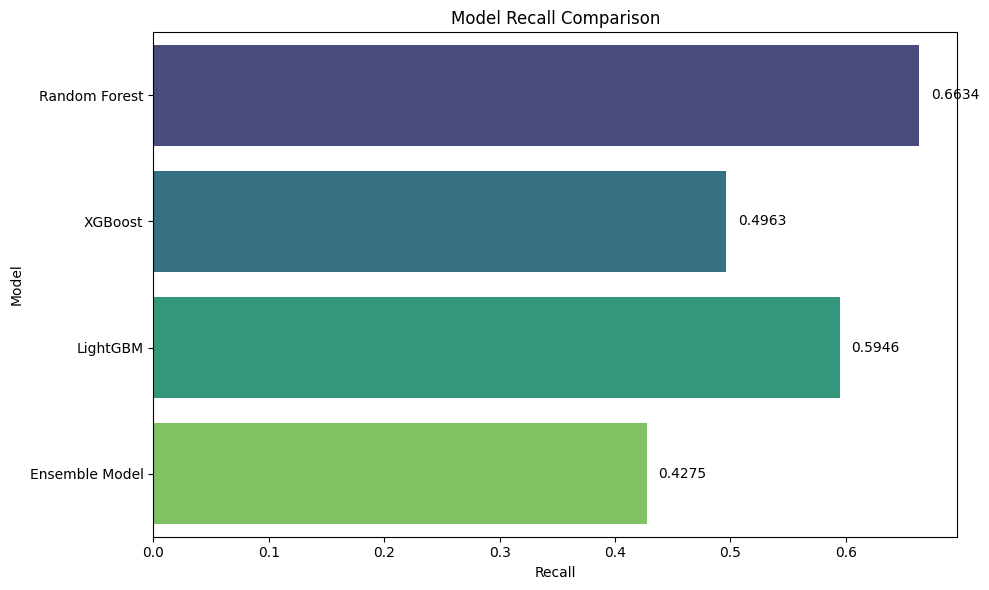

In [37]:
# Calculate recall for each model
recall_rf = recall_score(y_test, y_pred_rf)
recall_xgb = recall_score(y_test, y_pred_xg)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
recall_en = recall_score(y_test, y_pred_en)
# Create a dictionary with model names and corresponding recall values
recall_dict = {
    'Random Forest': recall_rf,
    'XGBoost': recall_xgb,
    'LightGBM': recall_lgbm,
    'Ensemble Model': recall_en
}

# Convert dictionary to DataFrame for easy plotting
recall_df = pd.DataFrame(list(recall_dict.items()), columns=['Model', 'Recall'])

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall', y='Model', data=recall_df, palette='viridis')

# Add the recall values on top of the bars
for index, value in enumerate(recall_df['Recall']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center')

# Set labels and title
plt.xlabel('Recall')
plt.ylabel('Model')
plt.title('Model Recall Comparison')
# Show the plot
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

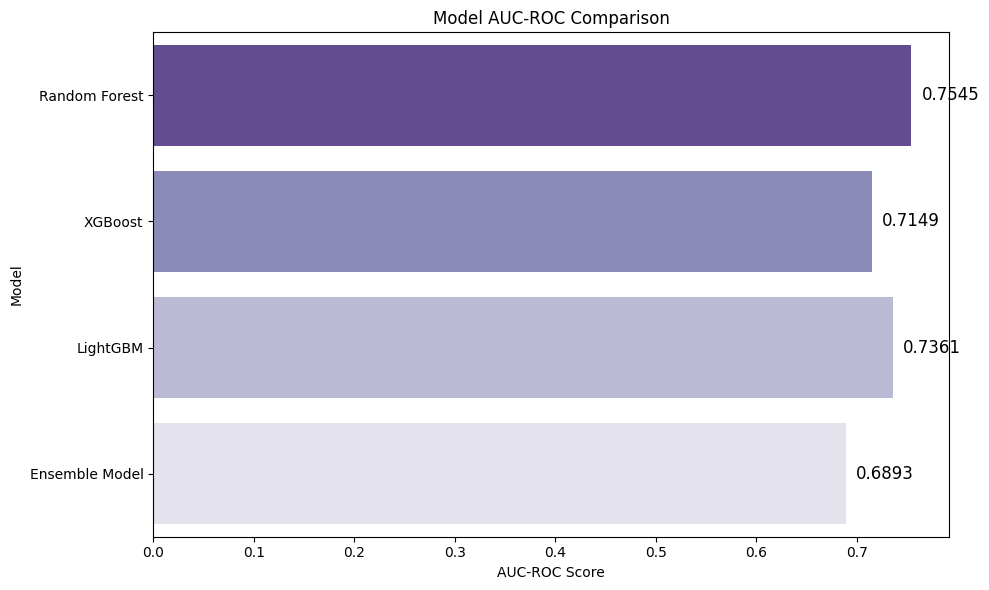

In [39]:
# Compute AUC-ROC scores
auc_roc_scores = {
    'Random Forest': roc_auc_score(y_test, y_pred_rf, average='macro'),
    'XGBoost': roc_auc_score(y_test, y_pred_xg, average='macro'),
    'LightGBM': roc_auc_score(y_test, y_pred_lgbm, average='macro'),
    'Ensemble Model': roc_auc_score(y_test, y_pred_en, average='macro')
}

# Convert to DataFrame
auc_df = pd.DataFrame(list(auc_roc_scores.items()), columns=['Model', 'AUC-ROC'])

# Create AUC-ROC bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AUC-ROC', y='Model', data=auc_df, palette='Purples_r')

# Add values on bars
for index, value in enumerate(auc_df['AUC-ROC']):
    plt.text(value + 0.01, index, f'{value:.4f}', va='center', fontsize=12)

# Labels and title
plt.xlabel('AUC-ROC Score')
plt.ylabel('Model')
plt.title('Model AUC-ROC Comparison')
plt.tight_layout()
plt.show()